# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [291]:
import numpy as np
from numpy import linalg

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [43]:
def max_element(arr):
    if_zero = arr==0
    return arr[1:][if_zero[:-1]].max() #с помощью слайсов массив zero[:-1] стал возвращать True для элементов, перед которыми стоят нули

In [44]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [45]:
def nearest_value(X, v):

    X = X.ravel() #превращает матрицу в список, "сплющивает" до одной строки
    index = np.abs(X - v).argmin() #по каждому элементу находим модуль разности элемента с v, записываем в массив. 
    return X[index]    #argmin() возвращает индекс минимального элемента
        

In [60]:
X = np.arange(0,10).reshape((2, 5))
nearest_value(X, 3.6)

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [202]:
def scale(X):
    y = np.std(X,0)
    return np.where(y!= 0, np.mean(X, 0)/np.std(X,0),None)   

In [203]:
X = np.random.randint(0,10,(3,3))
scale(X)

array([1.414213562373095, 3.7416573867739418, 4.543441112511215],
      dtype=object)

 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [309]:
def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)
    max_el = np.max(X)
    min_el = np.min(X)
    norm= np.linalg.norm(X) 
    eig_values = np.linalg.eigh(X)[0]
    inv_x = np.linalg.inv(X)
    
    return 'определитель: {} '.format(det), 'след: {}'.format(trace),'максимальный элемент: {}'.format(max_el),\
        'минимальный элемент: {}'.format(min_el),'норма Фробениуса: {}'.format(norm),\
            'собственные значения: {}'.format(eig_values), 'обратная матрица: {}'.format(inv_x) 



In [310]:
A = np.random.randint(1,10,(4,4))
get_stats(A)

('определитель: 336.0 ',
 'след: 21',
 'максимальный элемент: 9',
 'минимальный элемент: 1',
 'норма фробениуса: 21.587033144922902',
 'собственные значения: [-6.62154033 -0.06816971  6.78119677 20.90851326]',
 'обратная матрица: [[-0.27380952 -0.00892857  0.24107143  0.01785714]\n [ 0.96428571 -0.54464286 -0.29464286  0.08928571]\n [ 0.0952381   0.03571429  0.03571429 -0.07142857]\n [-0.54761905  0.48214286 -0.01785714  0.03571429]]')

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [314]:
max_elements = []
for exp_num in range(100):
    X = np.random.randint(1,100,(10,10))
    Y = np.random.randint(1,100,(10,10))
    t = np.dot(X,Y)
    max_elements.append(np.max(t))
    
print('средняя по максимумам: {}'.format(np.mean(max_elements)))
    
print('95% квантиль: {}'.format(np.quantile(max_elements, 0.96)))

    

средняя по максимумам: 41993.32
95% квантиль: 49521.92


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [204]:
import pandas as pd
%matplotlib inline

In [580]:
df = pd.read_csv('2008.csv')

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [206]:
# Your code here
df['CancellationCode'].value_counts()
#ответ: A: carrier

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [207]:
print('cреднее расстояние: ',df['Distance'].mean())
print('минимальное  расстояние: ',df['Distance'].min())
print('максимальное расстояние: ',df['Distance'].max())

cреднее расстояние:  724.5082571428571
минимальное  расстояние:  31
максимальное расстояние:  4962


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [213]:
m = df[df['Distance']==df['Distance'].min()]

In [215]:
m[['FlightNum','Year','Month','DayofMonth','Origin','Dest']] #В какие дни и на каких рейсах было подозрительно маленькое расстояние

,FlightNum,Year,Month,DayofMonth,Origin,Dest
1116,65,2008,12,30,WRG,PSG
6958,65,2008,12,26,WRG,PSG
17349,64,2008,8,18,PSG,WRG
27534,64,2008,3,11,PSG,WRG
46082,65,2008,8,9,WRG,PSG
48112,64,2008,2,28,PSG,WRG


In [229]:
flight_nums_min = m[['FlightNum','Year','Month','DayofMonth','Origin','Dest']]['FlightNum'].unique()

In [230]:
flight_nums_min 

array([65, 64], dtype=int64)

In [233]:
df[df.FlightNum.isin(flight_nums_min)]['Distance'].head() #Какое расстояние было пройдено этими же рейсами в другие дни?

501      533
1116      31
1389     680
1517     680
2619    2381
Name: Distance, dtype: int64

In [234]:
df[df.FlightNum.isin(flight_nums_min)]['Distance'].mean() #Какое расстояние было пройдено этими же рейсами в другие дни?

765.8205128205128

In [ ]:
#минимальное расстояне выглядит подозрительным, возможно, связано с необходимостью вернуться в аэропорт вылета

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [243]:
df['Origin'].sort_values().value_counts()[:1] 

ATL    4134
Name: Origin, dtype: int64

In [247]:
air = pd.read_csv('airports.csv')

In [248]:
air[air.iata=='ATL'] #больше всего вылетов произведено из аэропорта Атланты, США

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [267]:
df.groupby('Origin', as_index=False).aggregate({'AirTime':'mean'}).sort_values('AirTime',ascending=False).head()
#нашли среднее время полета для каждого аэропорта, наибольшее значение у аэопорта SJU

,Origin,AirTime
262,SJU,205.200000
38,BQN,193.954545
226,PSE,191.875000
272,STT,185.029412
16,ANC,165.415094


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [469]:
y = df.isnull().sum()
np.sum(y) # 364524 пропущенных элементов всего в таблице объект-признак

362524

In [452]:
df.isnull().sum().head() #проверили пропущенные значения, видим, что они присутствуют

Year             0
Month            0
DayofMonth       0
DayOfWeek        0
DepTime       1399
dtype: int64

In [457]:
#сколько объектов имеют хотя бы один пропуск:
t = df.isnull().sum(axis=1)

In [464]:
(t==0).value_counts() #все объекты имеют хотя бы один пропуск

False    70000
dtype: int64

In [465]:
#сколько признаков имеют хотя бы один пропуск:
(df.isnull().sum() == 0).value_counts() #17 признаков имеют хотя бы один пропуск

False    21
True     17
dtype: int64

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [440]:
# Your code here
df.DepDelay.isnull().sum() #в целевой переменной имеется 1399 пропущенных значений

1399

In [444]:
#проанализируем объекты с пропущенной переменной
df[df.DepDelay.isnull()].head(30) #их объединяет отсутствие времени отбытия и прибытия
#интересно, что при этом "ActualElapsedTime" и "CRSElapsedTime" не пустуют

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,DepTime_Minute,DepTime_Hour,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,DepDelay_abs
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,NaN,16,5,NaN,NaN,19,40,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,NaN,7,50,NaN,NaN,9,30,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,NaN,12,30,NaN,NaN,13,55,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,NaN,6,20,NaN,NaN,7,58,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,NaN,18,38,NaN,NaN,20,5,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,NaN,16,40,NaN,NaN,17,19,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,NaN,12,29,NaN,NaN,14,21,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,NaN,5,44,NaN,NaN,9,17,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,NaN,13,45,NaN,NaN,14,35,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,NaN,14,0,NaN,NaN,15,15,NaN


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [507]:
df['DepTime_Hour'] = (df['DepTime']//100) #часы
df['DepTime_Minute'] = (df['DepTime']%100) #минуты

df['CRSDepTime_Hour'] = (df['CRSDepTime']//100) #часы
df['CRSDepTime_Minute'] = (df['CRSDepTime']%100) #минуты

df['ArrTime_Hour'] = (df['ArrTime']//100) #часы
df['ArrTime_Minute'] = (df['ArrTime']%100) #минуты

df['CRSArrTime_Hour'] = (df['CRSArrTime']//100) #часы
df['CRSArrTime_Minute'] = (df['CRSArrTime']%100) #минуты


In [508]:
#проверим корректность подсчетов
print('Минуты больше 60: ', (df.DepTime_Minute>60).value_counts(),'\n')
print('Часы больше 24: ', (df.DepTime_Hour>24).value_counts(),'\n')

print('Минуты больше 60: ', (df.CRSDepTime_Minute>60).value_counts(),'\n')
print('Часы больше 24: ', (df.CRSDepTime_Hour>24).value_counts(),'\n')

print('Минуты больше 60: ', (df.ArrTime_Minute>60).value_counts(),'\n')
print('Часы больше 24: ', (df.ArrTime_Hour>24).value_counts(),'\n')

print('Минуты больше 60: ', (df.CRSArrTime_Minute>60).value_counts(),'\n')
print('Часы больше 24: ', (df.CRSArrTime_Hour>24).value_counts(),'\n')


Минуты больше 60:  False    70000
Name: DepTime_Minute, dtype: int64 

Часы больше 24:  False    70000
Name: DepTime_Hour, dtype: int64 

Минуты больше 60:  False    70000
Name: CRSDepTime_Minute, dtype: int64 

Часы больше 24:  False    70000
Name: CRSDepTime_Hour, dtype: int64 

Минуты больше 60:  False    70000
Name: ArrTime_Minute, dtype: int64 

Часы больше 24:  False    70000
Name: ArrTime_Hour, dtype: int64 

Минуты больше 60:  False    70000
Name: CRSArrTime_Minute, dtype: int64 

Часы больше 24:  False    70000
Name: CRSArrTime_Hour, dtype: int64 



In [509]:
df = df.drop(['DepTime', 'CRSArrTime','ArrTime','CRSDepTime'], axis=1)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [510]:
# Your code here
df = df.drop(['TailNum', 'Year'], axis=1)

In [485]:
df[df.CarrierDelay>0][['CarrierDelay','DepDelay','ArrDelay','NASDelay', 'WeatherDelay','SecurityDelay','LateAircraftDelay',\
                      'ActualElapsedTime','CRSElapsedTime']].head(30)

,CarrierDelay,DepDelay,ArrDelay,NASDelay,WeatherDelay,SecurityDelay,LateAircraftDelay,ActualElapsedTime,CRSElapsedTime
5,13.0,24.0,31.0,7.0,0.0,0.0,11.0,171.0,164.0
10,40.0,42.0,40.0,0.0,0.0,0.0,0.0,173.0,175.0
12,11.0,11.0,19.0,8.0,0.0,0.0,0.0,233.0,225.0
35,2.0,37.0,32.0,0.0,0.0,0.0,30.0,95.0,100.0
43,8.0,8.0,18.0,10.0,0.0,0.0,0.0,150.0,140.0
47,23.0,23.0,60.0,37.0,0.0,0.0,0.0,259.0,222.0
66,2.0,36.0,27.0,0.0,0.0,0.0,25.0,139.0,148.0
79,11.0,11.0,30.0,19.0,0.0,0.0,0.0,395.0,376.0
107,50.0,57.0,50.0,0.0,0.0,0.0,0.0,86.0,93.0
117,13.0,13.0,23.0,10.0,0.0,0.0,0.0,120.0,110.0


In [ ]:
#делэй на прибытие очевидно коррелирует с целевым признаком - чем позже вылет, тем позже прилет
#также существует некоторая корреляция между DepDelay и CarrierDelay, а также DepDelay и LateAircraftDelay

In [511]:
df = df.drop(['ArrDelay', 'CarrierDelay','LateAircraftDelay'], axis=1)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [487]:
from matplotlib.pyplot import plot
%matplotlib inline

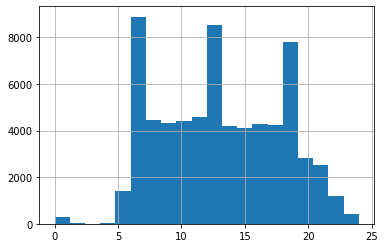

In [489]:
df['DepTime_Hour'].hist(bins=20) #нужно сгладить аутлайеры, тогда распределение будет еще ближе к нормальному

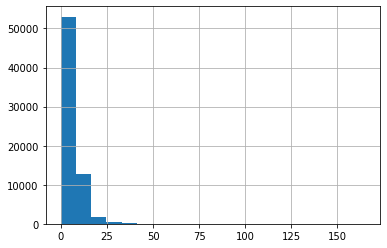

In [336]:
df['TaxiIn'].hist(bins=20); #необходимо масштабирование, сейчас график напоминает экспоненту

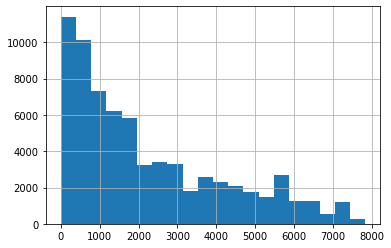

In [337]:
df['FlightNum'].hist(bins=20); #тоже похоже на экспоненту, хотя и не так сильно, как признак выше. 
#в таких случаях хорошо справляется логарифмирование

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

есть значения признаков, на несколько порядков превышающие другие значения. и в случае с линейными моделями это может вносить искажение в интерпретацию результатов и в сами результаты: признак может показать больший вес за счет своего большего числового значения.
масштабирование приводит все к одной шкале и выравнивает outliers - выдающиеся значения.
приближает выборки к гипотезе о нормальном распределении и позволяет строить линейную модель

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [514]:
from sklearn.preprocessing import StandardScaler

In [539]:
def transform_data(data):
    data_num = data.select_dtypes(include = ['float64', 'int64']).fillna(0)
    data_cat= data.select_dtypes(include = ['object']).fillna('nan')
    
    #машстабируем числовые признаки
    cols = data_num.columns.to_list()
    scaler = StandardScaler()
    scaler.fit(data_num)
    d_transformed = scaler.transform(data_num)
    #превращаем их обратно в DataFrame
    d_transformed = pd.DataFrame(d_transformed)
    d_transformed.columns = cols
    
    new_cat_df = pd.get_dummies(data_cat)
    
    new_data = pd.concat([d_transformed, new_cat_df], axis=1)
    return new_data
    
    
    
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [541]:
# Your code here
new_df = transform_data(df)

In [542]:
new_df.shape
#после преобразования получилось 644 признака

(70000, 644)

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [550]:
# Your code here
from sklearn.model_selection import train_test_split
X = new_df.drop(['DepDelay'], axis=1)
y = new_df['DepDelay']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [375]:
# Your code here

from sklearn.linear_model import LinearRegression


In [574]:
lreg = LinearRegression().fit(X_train[:1000],y_train[:1000])

In [575]:
lreg.intercept_ #огромный интерсепт

-1764992240282.5105

In [571]:
pred = lreg.predict(X_train[1000:])

In [567]:
lreg.coef_

array([-6.16497674e-02, -2.67327768e-02, -1.76890277e-02, -1.09691812e-01,
       -9.02825393e+12,  5.18282326e-01,  8.60198497e+12, -3.21925820e-02,
        6.17944870e+11,  1.42986573e+12,  5.03314267e+11, -5.56364721e+10,
        2.20764160e-01,  3.91601562e-01,  1.41601562e-02,  3.11981201e-01,
        4.12597656e-02, -1.19018555e-01,  3.07617188e-02, -2.44873047e-01,
        6.39648438e-02,  1.98974609e-01,  3.27148438e-02, -1.18556645e+11,
       -1.18556645e+11, -1.18556645e+11, -1.18556645e+11, -1.18556645e+11,
       -1.18556645e+11, -1.18556645e+11, -1.18556645e+11, -1.18556645e+11,
       -1.18556645e+11, -1.18556645e+11, -1.18556645e+11, -1.18556645e+11,
       -1.18556645e+11, -1.18556645e+11, -1.18556645e+11, -1.18556645e+11,
       -1.18556645e+11, -1.18556645e+11, -1.18556645e+11, -4.40206855e+10,
       -4.40206855e+10, -4.40206855e+10, -9.85099553e+10,  1.69558466e+11,
        3.05088339e+07, -1.28429077e+11, -3.08835839e+10, -7.89740493e+09,
        1.70640123e+10, -